# **Grupo 5**

### Juan Carlos Zuñiga M, Julián Morales, Leonardo Agudelo y Maria Camila Diaz

In [2]:
import pandas as pd                 #libreria para manejo de datos
import numpy as np                  #libreria para manejo de datos

import matplotlib.pyplot as plt     #libreria para graficos
import seaborn as sns               #libreria para graficos

import statsmodels.api as sm        #libreria para modelos estadisticos
from sklearn.metrics import mean_squared_error  #libreria para metricas de error

import random                 #mean_squared_error(y_true, y_pred) es la media del cuadrado de los errores

## Descripcion:

La organización necesita predecir qué tipo de planes de internet y en qué rango de precios serán más contratados en los próximos 3 meses, considerando el impacto del estrato socioeconómico en la decisión de compra.

Actualmente, no existe un modelo predictivo que permita anticipar la demanda según el precio y el estrato, lo que podría generar una oferta desalineada con las necesidades del mercado, afectando la rentabilidad, planificación comercial y fidelización de clientes.

# PREGUNTA SMART

## **¿Qué tipo de planes de internet y en qué rango de precios tienen mayor probabilidad de ser contratados en los próximos 3 meses, segmentados por estrato socioeconómico, con base en el histórico de ventas, rechazos y características de clientes en Cali?**


* **Específica**:   Define los tipo de planes, en Cali, segmentado por estrato, y con histórico de ventas, rechazados y características.

* **Medible**:	Se puede medir con frecuencias, ordendes creadas/rechazo, tendencias históricas y modelos predictivos.

* **Alcanzable**:	cuenta con un histórico de datos sobre ventas, rechazos y características de los clientes, lo que permite aplicar técnicas de análisis exploratorio y modelos predictivos. Con herramientas como Python, pandas y scikit-learn facilitan el procesamiento de la información y la construcción de modelos de predicción para estimar la probabilidad de contratación de cada tipo de plan.

* **Relevante**:	Permite tomar decisiones estratégicas: diseñar planes por segmento, ajustar campañas y anticipar demanda.

* **Temporal**:	Define un horizonte de análisis a "los próximos meses", lo que permite actualizaciones periódicas y adaptación al mercado.

***

#  Analisis Exploratorio

In [3]:
df = pd.read_csv("./Data/data_balanceada.csv")
#df = pd.read_csv('https://github.com/Grupos5-EDA-icesi/Analisis-Exploratorio/raw/main/FINAL/Data/data_sin_nulos.csv')

# Mostrar las dimensiones del DataFrame (filas, columnas)
print(df.shape)


(11925, 12)


# EDA - Analisis Exploratorio

## Analisis de Estructura

In [6]:
# Mostrar el nuevo DataFrame
df.describe(include='all')

,Genero,Edad,estrato,price_plan,nombre_zone,motivo_rechazo_solicitud,mes,dia,venta,grupo_edad,tipo_plan,plan_MB
count,11925,11925.000000,11925.000000,11925.000000,11925,11925,11925.000000,11925.000000,11925.000000,11925,11925,11925.000000
unique,2,NaN,NaN,NaN,4,7,NaN,NaN,NaN,5,2,NaN
top,H,NaN,NaN,NaN,O,No Aplica,NaN,NaN,NaN,18-29,Internet-voz,NaN
freq,7490,NaN,NaN,NaN,3940,7751,NaN,NaN,NaN,2782,9526,NaN
mean,NaN,41.950356,2.542977,66949.140577,NaN,NaN,6.257442,16.153962,0.649979,NaN,NaN,225.032285
std,NaN,13.662384,1.276159,6444.138643,NaN,NaN,3.346225,8.516807,0.476996,NaN,NaN,86.777599
min,NaN,18.000000,1.000000,55120.000000,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,80.000000
25%,NaN,30.000000,2.000000,61965.000000,NaN,NaN,3.000000,9.000000,0.000000,NaN,NaN,100.000000
50%,NaN,42.000000,2.000000,63749.000000,NaN,NaN,6.000000,16.000000,1.000000,NaN,NaN,250.000000
75%,NaN,53.000000,3.000000,70549.000000,NaN,NaN,9.000000,23.000000,1.000000,NaN,NaN,300.000000


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11925 entries, 0 to 11924
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Genero                    11925 non-null  object 
 1   Edad                      11925 non-null  int64  
 2   estrato                   11925 non-null  int64  
 3   price_plan                11925 non-null  float64
 4   nombre_zone               11925 non-null  object 
 5   motivo_rechazo_solicitud  11925 non-null  object 
 6   mes                       11925 non-null  int64  
 7   dia                       11925 non-null  int64  
 8   venta                     11925 non-null  int64  
 9   grupo_edad                11925 non-null  object 
 10  tipo_plan                 11925 non-null  object 
 11  plan_MB                   11925 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.1+ MB


In [8]:
df.isna().sum()     # Contar los valores nulos por columna

Genero                      0
Edad                        0
estrato                     0
price_plan                  0
nombre_zone                 0
motivo_rechazo_solicitud    0
mes                         0
dia                         0
venta                       0
grupo_edad                  0
tipo_plan                   0
plan_MB                     0
dtype: int64

In [114]:
# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Mostrar el número de columnas categóricas
print(f"Número de variables categóricas: {len(categorical_columns)}")

# Mostrar los nombres de las columnas categóricas
print("Variables categóricas:")
print(categorical_columns.to_list())

Número de variables categóricas: 5
Variables categóricas:
['Genero', 'nombre_zone', 'motivo_rechazo_solicitud', 'grupo_edad', 'tipo_plan']


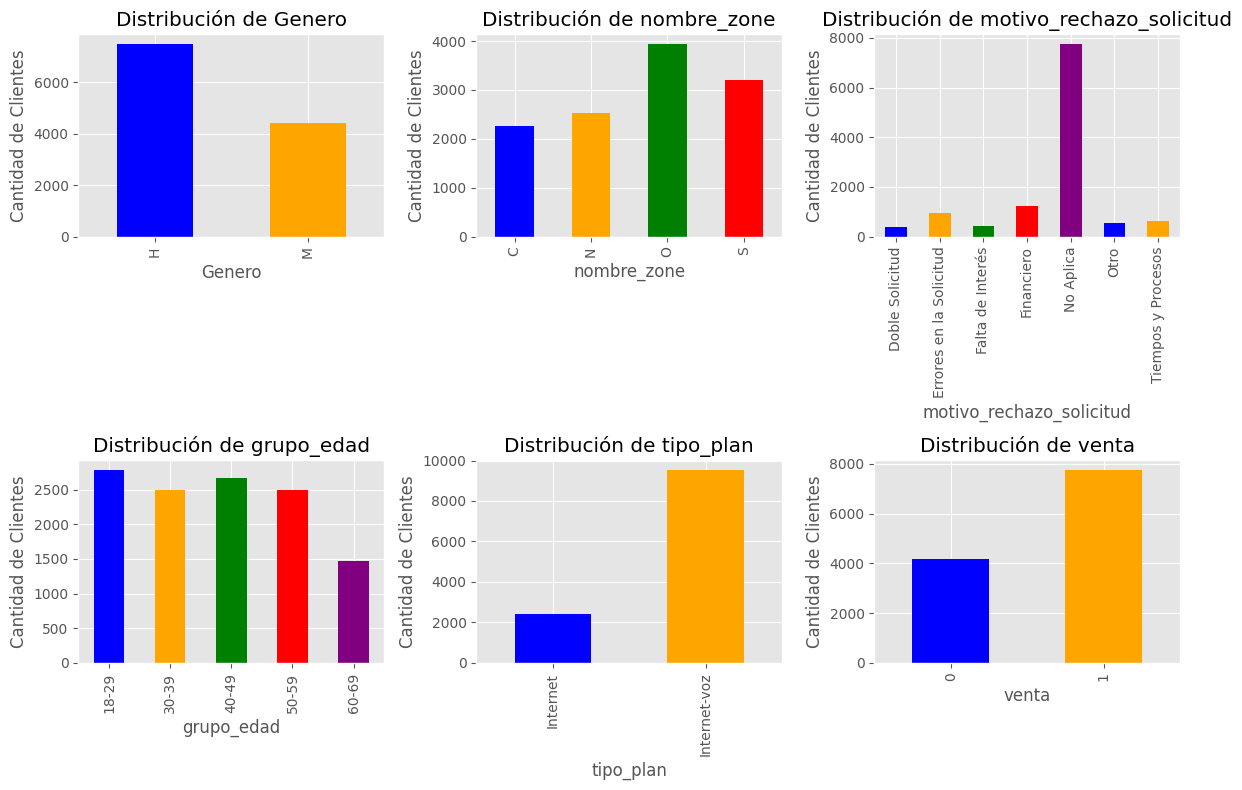

In [115]:
# Seleccionar variables categóricas a analizar
categorical_vars = ['Genero', 'nombre_zone', 'motivo_rechazo_solicitud', 'grupo_edad', 'tipo_plan', 'venta']

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear gráficos de barras para cada variable categórica
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    df[var].value_counts().sort_index().plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de Clientes')
    plt.xticks(rotation=90, ha='center')  # Rotar etiquetas del eje x a 90 grados y centrar

# Ajustar diseño
plt.tight_layout()
plt.show()

In [116]:
# Seleccionar las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Mostrar el número de columnas numéricas
print(f"Número de variables numéricas: {len(numeric_columns)}")

# Mostrar los nombres de las columnas numéricas
print("Variables numéricas:")
print(numeric_columns.to_list())

Número de variables numéricas: 7
Variables numéricas:
['Edad', 'estrato', 'price_plan', 'mes', 'dia', 'venta', 'plan_MB']


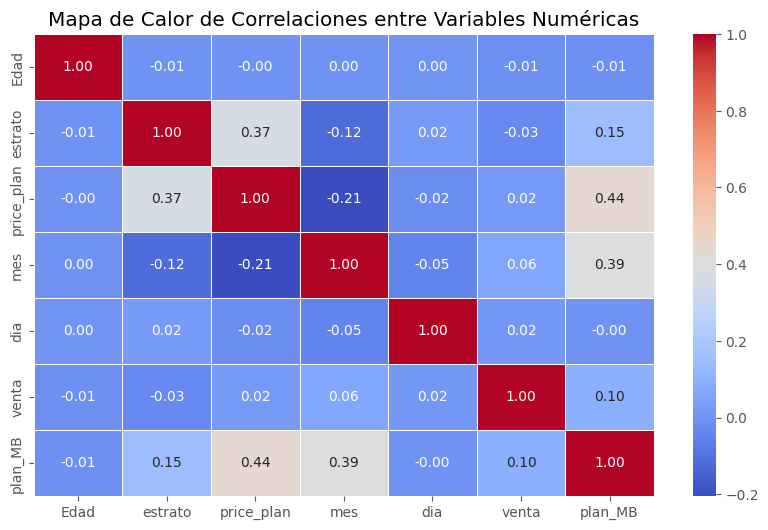

In [117]:
# Seleccionar solo las variables numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas")
plt.show()


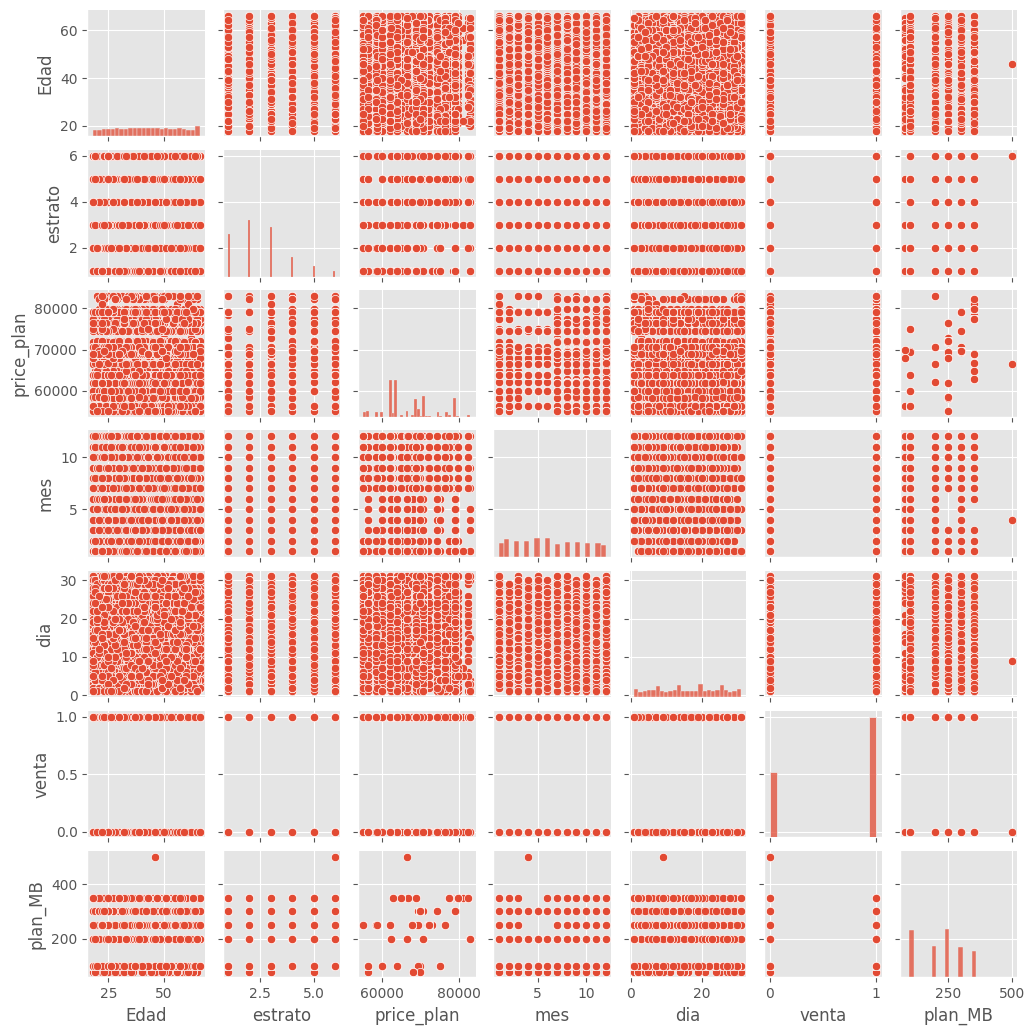

In [118]:
sns.pairplot(df_numeric, height=1.5)

## Variable price_plan

In [119]:
#descripcion de la variable price_plan
df["price_plan"].describe()

count    11925.000000
mean     66949.140577
std       6444.138643
min      55120.000000
25%      61965.000000
50%      63749.000000
75%      70549.000000
max      83000.000000
Name: price_plan, dtype: float64

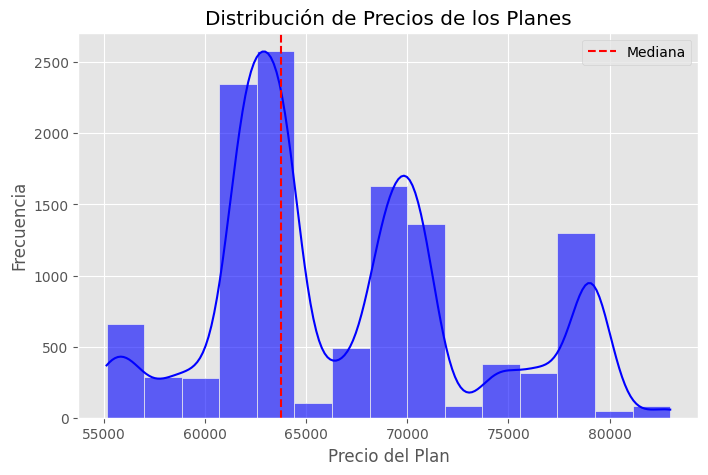

In [120]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price_plan'], bins=15, kde=True, color='blue', alpha=0.6)
plt.xlabel('Precio del Plan')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de los Planes')

# Línea de la mediana para destacar la asimetría
plt.axvline(df['price_plan'].median(), color='red', linestyle='dashed', label='Mediana')
plt.legend()

# Mostrar gráfico
plt.show()

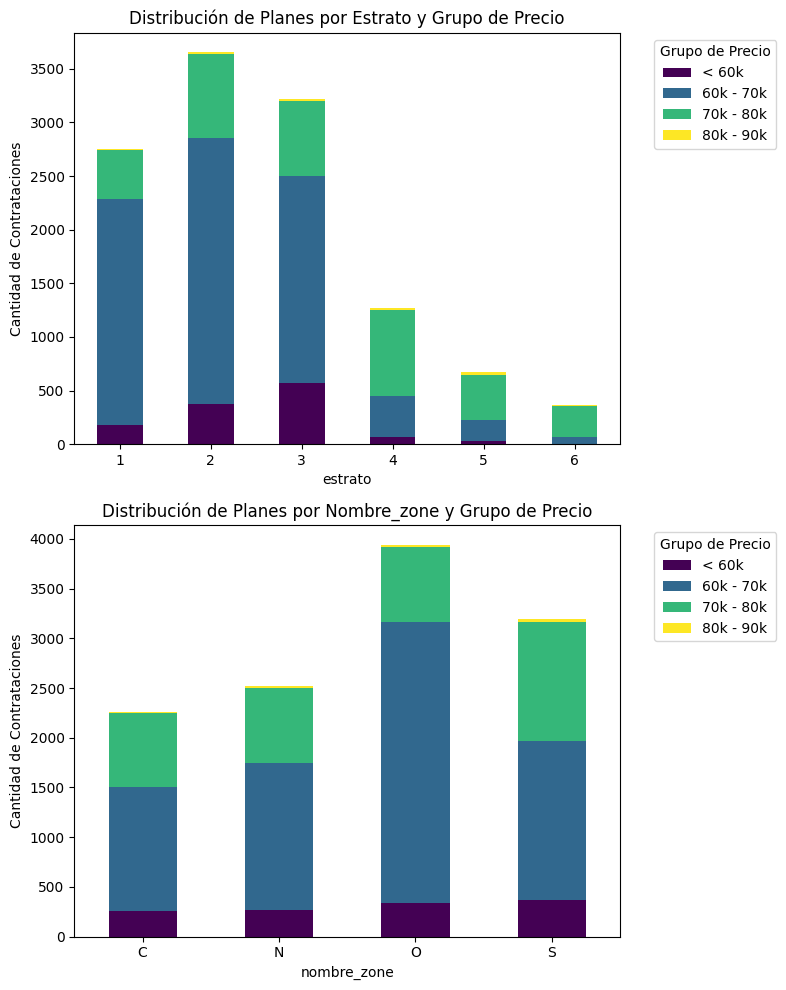

In [5]:
# Definir los rangos de precio
bins_precio = [0, 60000, 70000, 80000, 90000, 100000, float('inf')]
labels_precio = ['< 60k', '60k - 70k', '70k - 80k', '80k - 90k', '90k - 100k', '> 100k']

# Crear una nueva columna con los grupos de precio
#df['grupo_precio'] = pd.cut(df['price_plan'], bins=bins_precio, labels=labels_precio, right=False)

# Variables categóricas a analizar
categorical_vars = ['estrato', 'nombre_zone']

# Crear la figura y los ejes para las subgráficas
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Crear gráficos de barras apilados para cada variable categórica
for i, var in enumerate(categorical_vars):
    # Crear los grupos de precio temporalmente
    grupo_precio = pd.cut(df['price_plan'], bins=bins_precio, labels=labels_precio, right=False)
    
    # Crear la tabla de contingencia
    tabla_contingencia = pd.crosstab(df[var], grupo_precio)
    
    # Crear el gráfico de barras apilado
    tabla_contingencia.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Cantidad de Contrataciones')
    axes[i].set_title(f'Distribución de Planes por {var.capitalize()} y Grupo de Precio')
    axes[i].legend(title="Grupo de Precio", bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

# Ajustar diseño
plt.tight_layout()
plt.show()

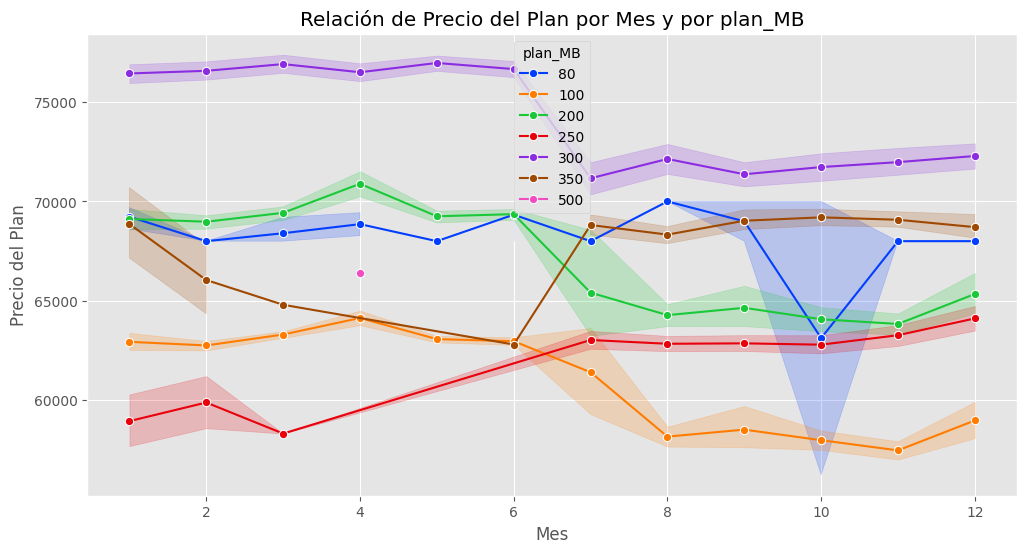

In [122]:
# Configuración de estilo
plt.style.use('ggplot')

# Obtener el número de categorías en plan_MB
num_categories = df['plan_MB'].nunique()

# Definir una paleta de colores personalizada con el número exacto de categorías
custom_palette = sns.color_palette("bright", num_categories)

# Gráfico de relación entre precio del plan por mes y por plan_MB
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="mes", y="price_plan", hue="plan_MB", marker="o", palette=custom_palette)
plt.title("Relación de Precio del Plan por Mes y por plan_MB")
plt.xlabel("Mes")
plt.ylabel("Precio del Plan")
plt.legend(title="plan_MB")
plt.show()

## Variable estrato

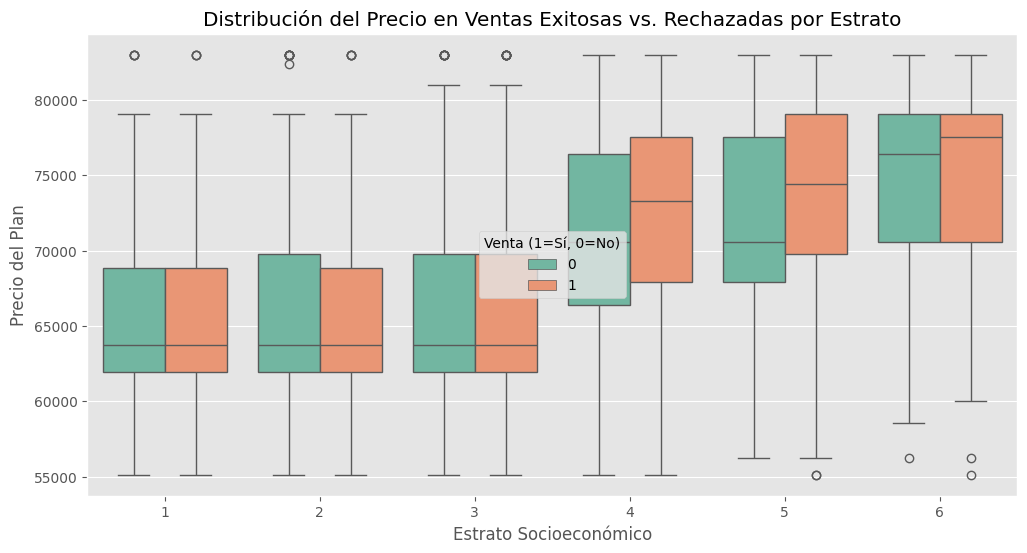

In [123]:
# Análisis de distribución del precio en ventas exitosas vs. rechazadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="estrato", y="price_plan", hue="venta", palette="Set2")
plt.title("Distribución del Precio en Ventas Exitosas vs. Rechazadas por Estrato")
plt.xlabel("Estrato Socioeconómico")
plt.ylabel("Precio del Plan")
plt.legend(title="Venta (1=Sí, 0=No)")
plt.show()

### Distribución del Precio en Ventas Exitosas vs. Rechazadas por Estrato:

- Se observa la dispersión de los precios de los planes contratados y rechazados en cada estrato socioeconómico.
- Se pueden identificar rangos de precios más aceptados y aquellos que tienden a ser rechazados.

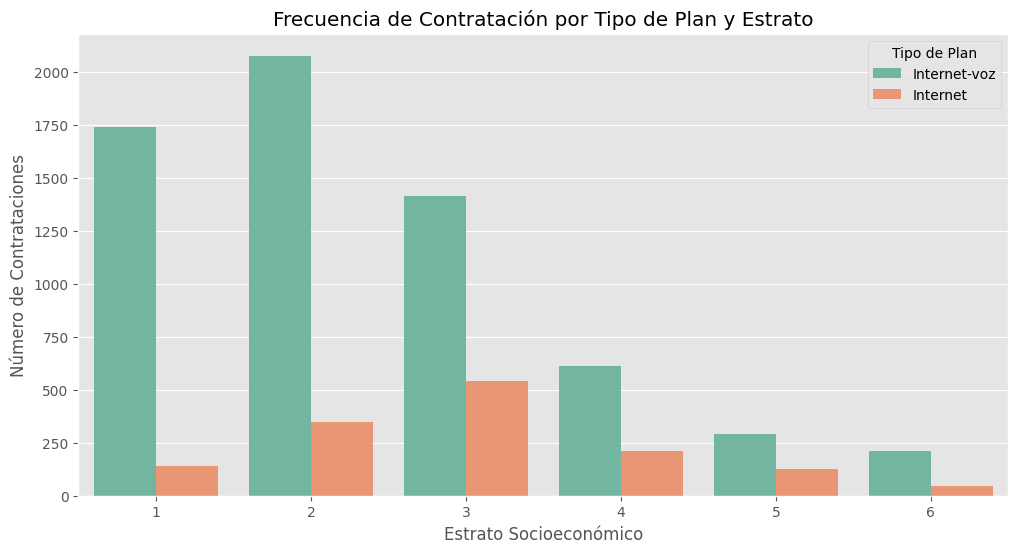

In [124]:
# Frecuencia de contratación por tipo de plan y estrato
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df["venta"] == 1], x="estrato", hue="tipo_plan", palette="Set2")
plt.title("Frecuencia de Contratación por Tipo de Plan y Estrato")
plt.xlabel("Estrato Socioeconómico")
plt.ylabel("Número de Contrataciones")
plt.legend(title="Tipo de Plan")
plt.show()

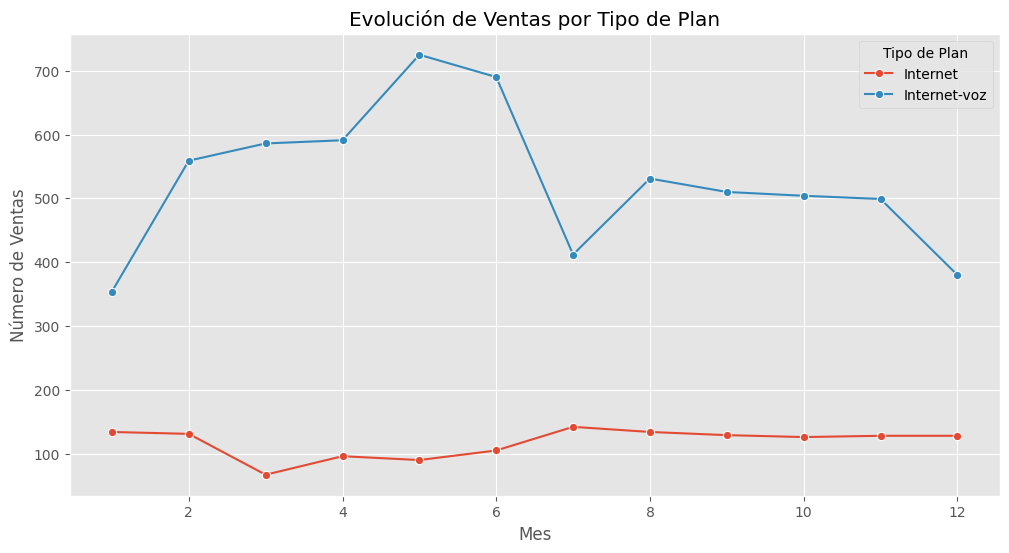

In [125]:
# Evolución de las ventas por tipo de plan a lo largo del tiempo
df_ventas = df[df["venta"] == 1].groupby(["mes", "tipo_plan"]).size().reset_index(name="total_ventas")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ventas, x="mes", y="total_ventas", hue="tipo_plan", marker="o")
plt.title("Evolución de Ventas por Tipo de Plan")
plt.xlabel("Mes")
plt.ylabel("Número de Ventas")
plt.legend(title="Tipo de Plan")
plt.show()

### Frecuencia de Contratación por Tipo de Plan y Estrato:

- Se muestra cuántos planes han sido contratados en cada estrato, diferenciados por tipo de plan.
- Esto permite identificar qué tipos de planes son más populares en cada nivel socioeconómico.

### Evolución de Ventas por Tipo de Plan:

- Se observa cómo han variado las ventas de los diferentes tipos de planes a lo largo de los meses.
- Es útil para detectar tendencias crecientes o decrecientes en la demanda.

## Solicitudes rechazadas por estrato

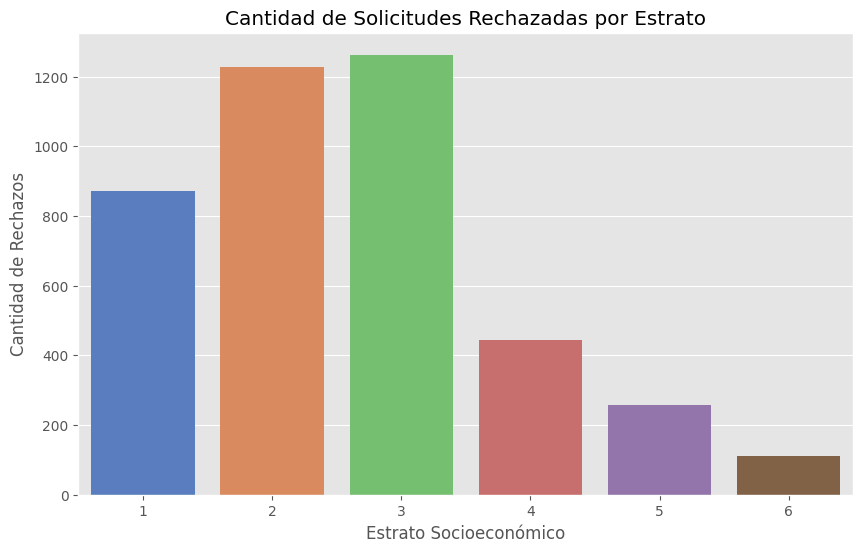

In [126]:
# Filtrar solo los casos donde la venta fue rechazada (retiros o no contratación)
df_retiros = df[df["venta"] == 0]

# Contar la cantidad de rechazos por estrato
retiros_por_estrato = df_retiros["estrato"].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=retiros_por_estrato.index, y=retiros_por_estrato.values, hue=retiros_por_estrato.index, palette="muted", dodge=False, legend=False)
plt.title("Cantidad de Solicitudes Rechazadas por Estrato")
plt.xlabel("Estrato Socioeconómico")
plt.ylabel("Cantidad de Rechazos")
plt.show()

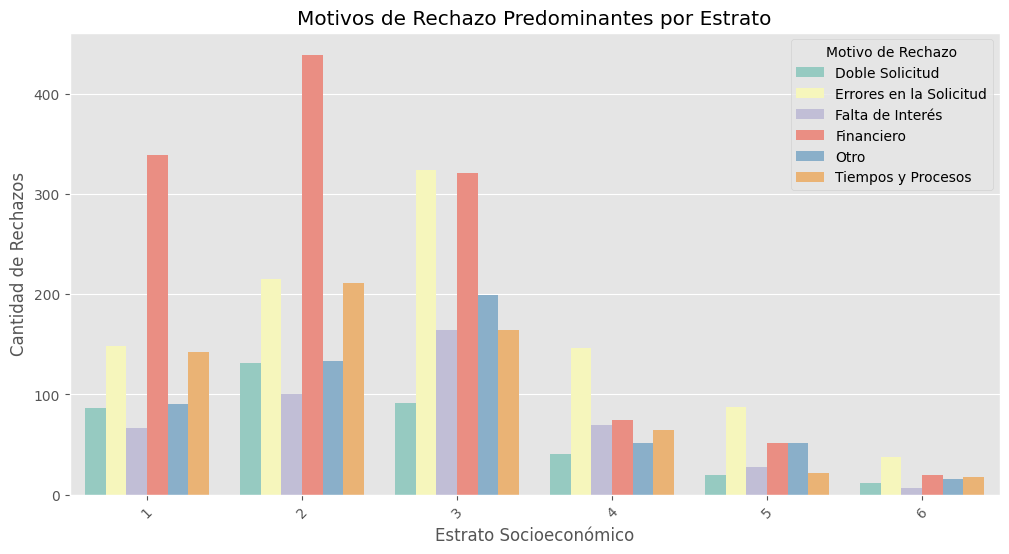

In [127]:
# Motivos de rechazo predominantes por estrato
df_motivos = df[df["venta"] == 0].groupby(["estrato", "motivo_rechazo_solicitud"]).size().reset_index(name="total_rechazos")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_motivos, x="estrato", y="total_rechazos", hue="motivo_rechazo_solicitud", palette="Set3")
plt.title("Motivos de Rechazo Predominantes por Estrato")
plt.xlabel("Estrato Socioeconómico")
plt.ylabel("Cantidad de Rechazos")
plt.legend(title="Motivo de Rechazo", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

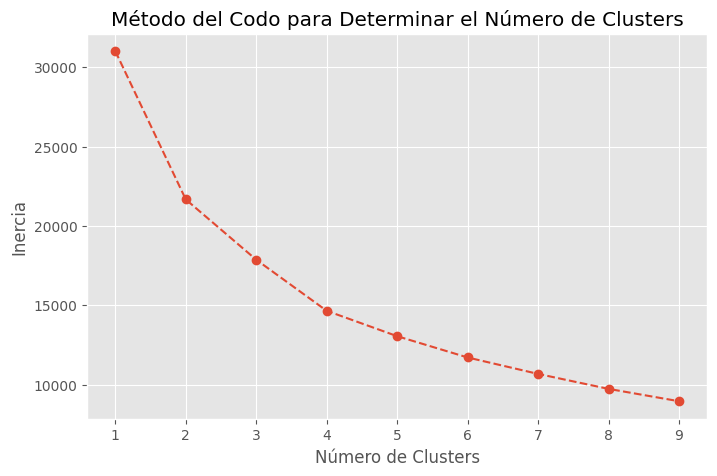

,Edad,estrato,price_plan,plan_MB
cluster,,,,
0,53.832565,2.051661,65217.851659,266.651292
1,29.711762,2.029289,65671.182891,274.314272
2,41.732464,4.190565,75907.641710,274.115456
3,41.831960,2.153762,63033.292584,100.713893


In [128]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selección de variables relevantes para el clustering
variables_clustering = ["Edad", "estrato", "price_plan", "plan_MB"]
df_cluster = df[df["venta"] == 1][variables_clustering].dropna()

# Escalado de las variables para mejor desempeño del clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Determinación del número óptimo de clusters con el método del codo
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker="o", linestyle="--")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para Determinar el Número de Clusters")
plt.show()

# Aplicación de K-Means con el número óptimo de clusters (probablemente 3 o 4)
optimal_k = 4  # Se puede ajustar tras revisar el gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster["cluster"] = kmeans.fit_predict(df_scaled)

# Perfil de los clusters (promedio de cada variable por cluster)
df_cluster.groupby("cluster").mean()

## Codificacion de variables categóricas

In [129]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11925 entries, 0 to 11924
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Genero                    11925 non-null  object 
 1   Edad                      11925 non-null  int64  
 2   estrato                   11925 non-null  int64  
 3   price_plan                11925 non-null  float64
 4   nombre_zone               11925 non-null  object 
 5   motivo_rechazo_solicitud  11925 non-null  object 
 6   mes                       11925 non-null  int64  
 7   dia                       11925 non-null  int64  
 8   venta                     11925 non-null  int64  
 9   grupo_edad                11925 non-null  object 
 10  tipo_plan                 11925 non-null  object 
 11  plan_MB                   11925 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.1+ MB


In [9]:
df.shape

(11925, 12)

In [10]:
# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Mostrar el número de columnas categóricas
print(f"Número de variables categóricas: {len(categorical_columns)}")

# Mostrar los nombres de las columnas categóricas y la cantidad de categorías en cada una
print("Cantidad de categorías por variable categórica:")
for col in categorical_columns:
    num_categories = df[col].nunique()
    print(f"{col}: {num_categories} categorías")

Número de variables categóricas: 5
Cantidad de categorías por variable categórica:
Genero: 2 categorías
nombre_zone: 4 categorías
motivo_rechazo_solicitud: 7 categorías
grupo_edad: 5 categorías
tipo_plan: 2 categorías


### transformación de columna label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()


df['genero_label'] = labelencoder.fit_transform(df['Genero'])

df['tipo_plan_label'] = labelencoder.fit_transform(df['tipo_plan'])

In [12]:
#eliminar columnas originales
df = df.drop(['Genero', 'tipo_plan'], axis=1)
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(11925, 12)

### transformación de columna one-hot encoding

In [13]:
# Supongamos que tienes las siguientes columnas categóricas nominales
categorical_columns = ['nombre_zone', 'grupo_edad']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Ver el resultado
df_encoded.head()

,Edad,estrato,price_plan,motivo_rechazo_solicitud,mes,dia,venta,plan_MB,genero_label,tipo_plan_label,nombre_zone_N,nombre_zone_O,nombre_zone_S,grupo_edad_30-39,grupo_edad_40-49,grupo_edad_50-59,grupo_edad_60-69
0,40,2,63749.0,Tiempos y Procesos,6,18,0,100,0,1,False,False,True,False,True,False,False
1,65,2,70549.0,No Aplica,6,4,1,200,0,1,True,False,False,False,False,False,True
2,27,2,61965.0,No Aplica,8,5,1,250,0,1,False,False,False,False,False,False,False
3,41,3,70549.0,No Aplica,5,29,1,200,0,1,True,False,False,False,True,False,False
4,65,4,70549.0,No Aplica,4,13,1,200,0,1,False,False,True,False,False,False,True


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11925 entries, 0 to 11924
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Edad                      11925 non-null  int64  
 1   estrato                   11925 non-null  int64  
 2   price_plan                11925 non-null  float64
 3   motivo_rechazo_solicitud  11925 non-null  object 
 4   mes                       11925 non-null  int64  
 5   dia                       11925 non-null  int64  
 6   venta                     11925 non-null  int64  
 7   plan_MB                   11925 non-null  int64  
 8   genero_label              11925 non-null  int64  
 9   tipo_plan_label           11925 non-null  int64  
 10  nombre_zone_N             11925 non-null  bool   
 11  nombre_zone_O             11925 non-null  bool   
 12  nombre_zone_S             11925 non-null  bool   
 13  grupo_edad_30-39          11925 non-null  bool   
 14  grupo_

In [15]:
# Supongamos que tienes las siguientes columnas categóricas nominales

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=['motivo_rechazo_solicitud'])

# Ver el resultado
df_encoded.head()

,Edad,estrato,price_plan,mes,dia,venta,plan_MB,genero_label,tipo_plan_label,nombre_zone_N,...,grupo_edad_40-49,grupo_edad_50-59,grupo_edad_60-69,motivo_rechazo_solicitud_Doble Solicitud,motivo_rechazo_solicitud_Errores en la Solicitud,motivo_rechazo_solicitud_Falta de Interés,motivo_rechazo_solicitud_Financiero,motivo_rechazo_solicitud_No Aplica,motivo_rechazo_solicitud_Otro,motivo_rechazo_solicitud_Tiempos y Procesos
0,40,2,63749.0,6,18,0,100,0,1,False,...,True,False,False,False,False,False,False,False,False,True
1,65,2,70549.0,6,4,1,200,0,1,True,...,False,False,True,False,False,False,False,True,False,False
2,27,2,61965.0,8,5,1,250,0,1,False,...,False,False,False,False,False,False,False,True,False,False
3,41,3,70549.0,5,29,1,200,0,1,True,...,True,False,False,False,False,False,False,True,False,False
4,65,4,70549.0,4,13,1,200,0,1,False,...,False,False,True,False,False,False,False,True,False,False


In [16]:
df_encoded.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11925 entries, 0 to 11924
Data columns (total 23 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Edad                                              11925 non-null  int64  
 1   estrato                                           11925 non-null  int64  
 2   price_plan                                        11925 non-null  float64
 3   mes                                               11925 non-null  int64  
 4   dia                                               11925 non-null  int64  
 5   venta                                             11925 non-null  int64  
 6   plan_MB                                           11925 non-null  int64  
 7   genero_label                                      11925 non-null  int64  
 8   tipo_plan_label                                   11925 non-null  int64  
 9   nombre_zone_N    

In [6]:
# Guardar el DataFrame en un archivo CSV
df_encoded.to_csv("./Data/data_codificada.csv", index=False)

NameError: name 'df_encoded' is not defined

***
***
***
***
***

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegressionCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier

In [13]:
df = pd.read_csv("./Data/data_codificada.csv")
#df = pd.read_csv('https://github.com/Grupos5-EDA-icesi/Analisis-Exploratorio/raw/main/FINAL/Data/data_sin_nulos.csv')

# Mostrar las dimensiones del DataFrame (filas, columnas)
print(df.shape)

(11925, 23)


In [14]:
#Identificar Valores Duplicados
df.duplicated().sum()

56

In [15]:
# Eliminar duplicados y mantener solo la primera aparición
df = df.drop_duplicates()

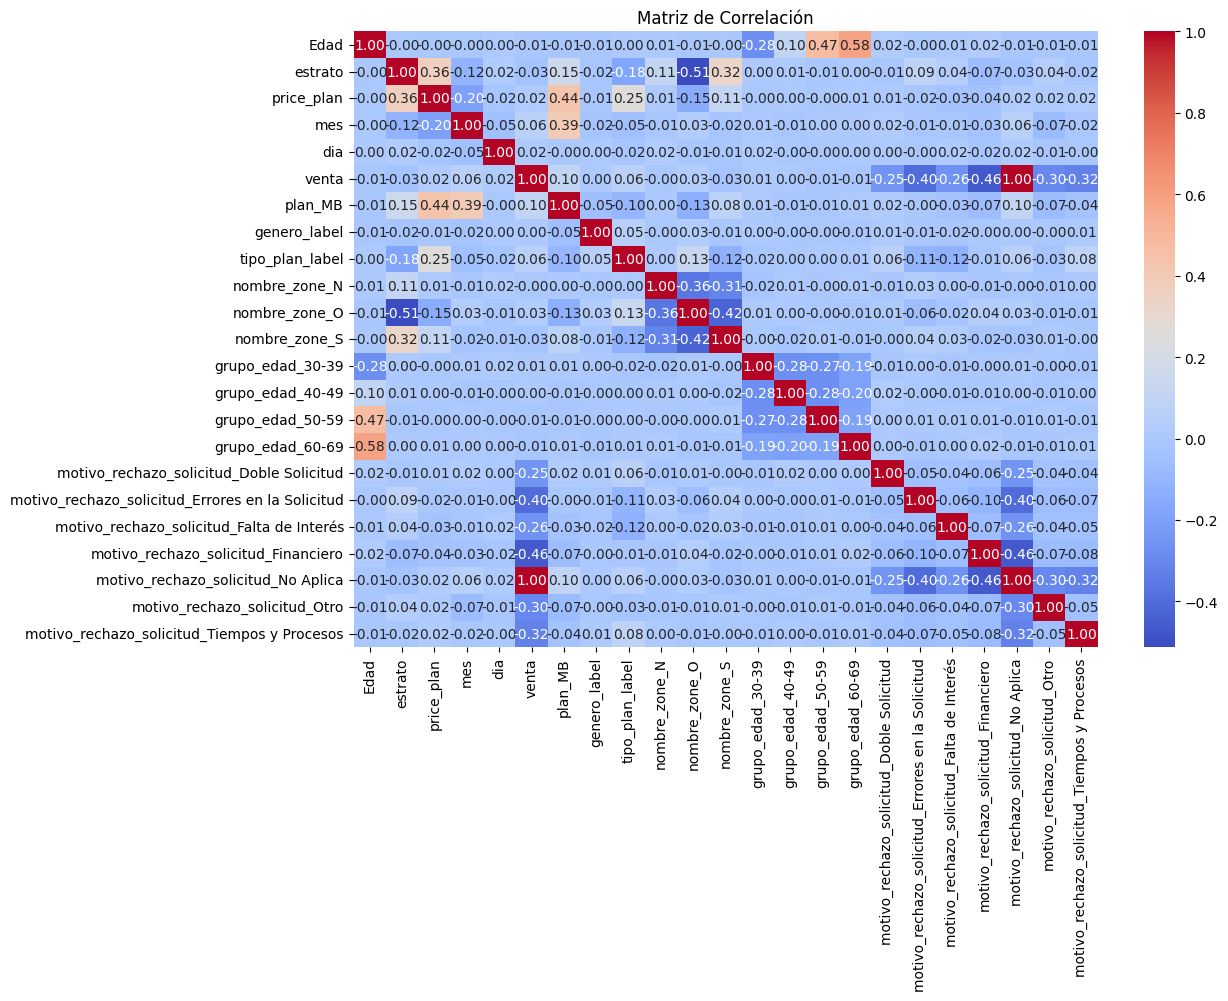

motivo_rechazo_solicitud_No Aplica                  1.000000
venta                                               1.000000
motivo_rechazo_solicitud_Financiero                 0.464225
motivo_rechazo_solicitud_Errores en la Solicitud    0.402321
motivo_rechazo_solicitud_Tiempos y Procesos         0.318939
motivo_rechazo_solicitud_Otro                       0.296599
motivo_rechazo_solicitud_Falta de Interés           0.264348
motivo_rechazo_solicitud_Doble Solicitud            0.247070
plan_MB                                             0.099503
tipo_plan_label                                     0.063861
mes                                                 0.060260
estrato                                             0.028909
nombre_zone_S                                       0.026886
nombre_zone_O                                       0.025145
price_plan                                          0.022378
dia                                                 0.015723
Edad                    

In [138]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Seleccionar características con alta correlación con la variable objetivo
target_correlation = correlation_matrix['venta'].abs().sort_values(ascending=False)
print(target_correlation)

In [16]:
#eliminar la variable motivo_rechazo_solicitud_No Aplica

# df = df.drop(['motivo_rechazo_solicitud_No Aplica'], axis=1)

df = df.drop([
    'motivo_rechazo_solicitud_No Aplica', 
    'motivo_rechazo_solicitud_Financiero',
    'motivo_rechazo_solicitud_Errores en la Solicitud'
], axis=1)

# df = df.drop([
#     'motivo_rechazo_solicitud_Financiero', 
#     'motivo_rechazo_solicitud_Errores en la Solicitud', 
#     'motivo_rechazo_solicitud_Tiempos y Procesos', 
#     'motivo_rechazo_solicitud_Otro', 
#     'motivo_rechazo_solicitud_Falta de Interés', 
#     'motivo_rechazo_solicitud_Doble Solicitud'
# ], axis=1)

# Mostrar el DataFrame después de eliminar las columnas
df.shape

(11869, 20)

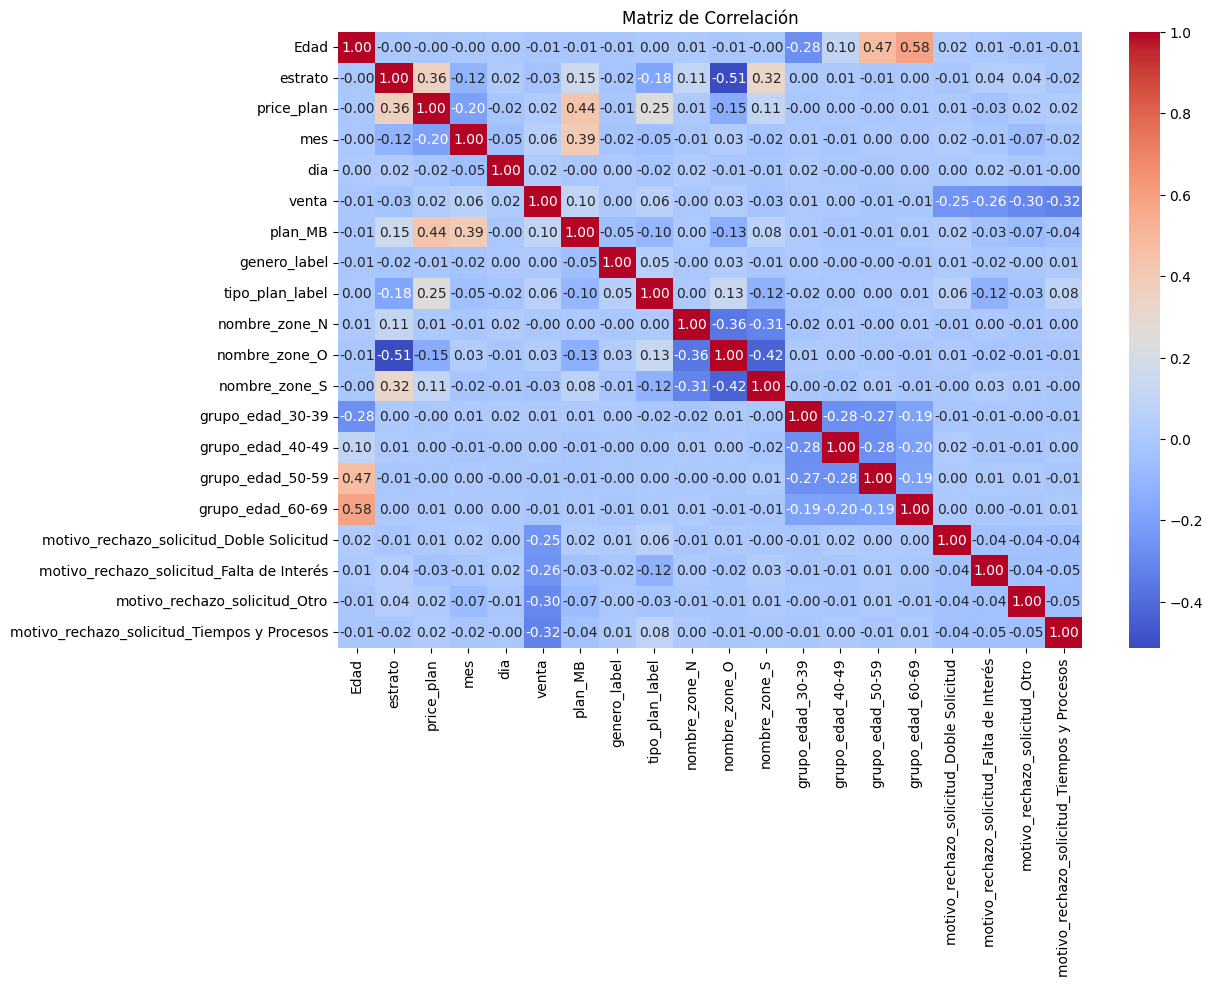

In [140]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## **División de los Datos**  

Este paso es importante porque nos permite evaluar qué tan bien se desempeña el modelo con datos no vistos, simulando el comportamiento en el mundo real.

In [21]:
# Definir la variable objetivo (Y) y las variables predictoras (X)
X = df.drop(columns=['venta'])  # Eliminamos la variable objetivo del conjunto de predictores
y = df['venta']  # Variable objetivo

# Verificar las dimensiones de los conjuntos de datos
X.shape, y.shape

((11869, 19), (11869,))

In [22]:
#format the features names:
X.index.names = ['Customer_ID']
X.columns = [col.replace(' ', '_') for col in X.columns.tolist()]
X.columns = [col.replace('(', '_') for col in X.columns.tolist()]
X.columns = [col.replace(')', '') for col in X.columns.tolist()]
X.columns = [col.replace(']', '_') for col in X.columns.tolist()]
X.columns = [col.replace(',', '') for col in X.columns.tolist()]

X.columns

Index(['Edad', 'estrato', 'price_plan', 'mes', 'dia', 'plan_MB',
       'genero_label', 'tipo_plan_label', 'nombre_zone_N', 'nombre_zone_O',
       'nombre_zone_S', 'grupo_edad_30-39', 'grupo_edad_40-49',
       'grupo_edad_50-59', 'grupo_edad_60-69',
       'motivo_rechazo_solicitud_Doble_Solicitud',
       'motivo_rechazo_solicitud_Falta_de_Interés',
       'motivo_rechazo_solicitud_Otro',
       'motivo_rechazo_solicitud_Tiempos_y_Procesos'],
      dtype='object')

In [23]:

# using the train test split function
# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar el tamaño de los conjuntos resultantes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9495, 19), (2374, 19), (9495,), (2374,))

## **Estandarizar los datos**  

In [24]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***
## **Predecir si habrá venta o no (venta)**

## **Modelo de Regresión Logística**

Accuracy: 0.8112889637742208
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.46      0.63       834
           1       0.77      1.00      0.87      1540

    accuracy                           0.81      2374
   macro avg       0.89      0.73      0.75      2374
weighted avg       0.85      0.81      0.79      2374



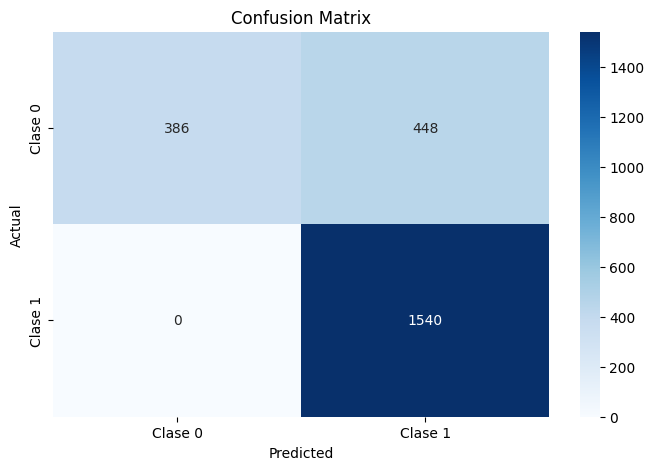

In [28]:
# Entrenar un modelo de Regresión Logística
log_reg2 = LogisticRegression(max_iter=1000, random_state=42)
log_reg2.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred = log_reg2.predict(X_test_scaled)

# Medir el accuracy
accuracy2 = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report2 = classification_report(y_test, y_pred)

# Mostrar resultados
print(f"Accuracy: {accuracy2}")
# print("Confusion Matrix:")
# print(conf_matrix2)
print("Classification Report:")
print(class_report2)

# Crear un heatmap para la matriz de confusión
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [110]:
common_rows = X_train.merge(X_test, how='inner')
print(f"Número de filas compartidas entre train y test: {common_rows.shape[0]}")

Número de filas compartidas entre train y test: 5


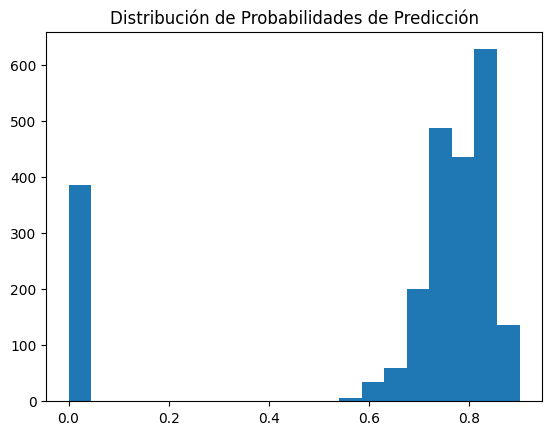

In [111]:
y_probs = log_reg2.predict_proba(X_test_scaled)[:, 1]
plt.hist(y_probs, bins=20)
plt.title("Distribución de Probabilidades de Predicción")
plt.show()

## Lasso

In [112]:
# Aplicar Lasso
lasso = Lasso(alpha=0.05)
lasso.fit(X_train_scaled, y_train)

# Obtener las características seleccionadas
coefficients = lasso.coef_
selected_features = X_train.columns[coefficients != 0]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['motivo_rechazo_solicitud_Doble_Solicitud',
       'motivo_rechazo_solicitud_Falta_de_Interés',
       'motivo_rechazo_solicitud_Otro',
       'motivo_rechazo_solicitud_Tiempos_y_Procesos'],
      dtype='object')


## Random Forest

In [113]:
# Entrenar un modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame con la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importance_df)

# Seleccionar las características más relevantes (por ejemplo, las top 10)
selected_features = importance_df['Feature'].head(10).tolist()
print("Características seleccionadas:", selected_features)

                                        Feature  Importance
4                                           dia    0.160989
0                                          Edad    0.142887
18  motivo_rechazo_solicitud_Tiempos_y_Procesos    0.110591
3                                           mes    0.095681
17                motivo_rechazo_solicitud_Otro    0.088831
15     motivo_rechazo_solicitud_Doble_Solicitud    0.072135
16    motivo_rechazo_solicitud_Falta_de_Interés    0.072043
1                                       estrato    0.054163
2                                    price_plan    0.052628
5                                       plan_MB    0.032975
6                                  genero_label    0.025108
10                                nombre_zone_S    0.015671
8                                 nombre_zone_N    0.015316
9                                 nombre_zone_O    0.014630
7                               tipo_plan_label    0.010778
11                             grupo_eda

### Random Forest (Basado en Árboles)

- Random Forest es un modelo no lineal que no necesita normalización y maneja bien interacciones y relaciones no lineales.
- Importancia de características: Mide cuánto cada variable mejora la predicción en promedio (por reducción de impureza o permutaciones).
- Puede seleccionar muchas variables, incluso si están correlacionadas.
- Por eso seleccionó varias características, porque identifica relaciones complejas entre las variables y la variable objetivo (venta).

### Lasso (Regresión Lineal con Regularización L1)

- Lasso fuerza muchos coeficientes a ser exactamente 0 si la variable no tiene suficiente impacto en la predicción.
- Es un modelo lineal, lo que significa que solo capta relaciones lineales entre las variables y la variable objetivo.
- Si las variables están muy correlacionadas, Lasso tiende a seleccionar solo una de ellas o ninguna.
- Si las variables tienen coeficientes pequeños, un alpha muy grande en Lasso puede hacer que todas queden en 0.

## **Modelo Random Forest**

Accuracy: 0.7957034540859309
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.51      0.64       834
           1       0.78      0.95      0.86      1540

    accuracy                           0.80      2374
   macro avg       0.81      0.73      0.75      2374
weighted avg       0.81      0.80      0.78      2374



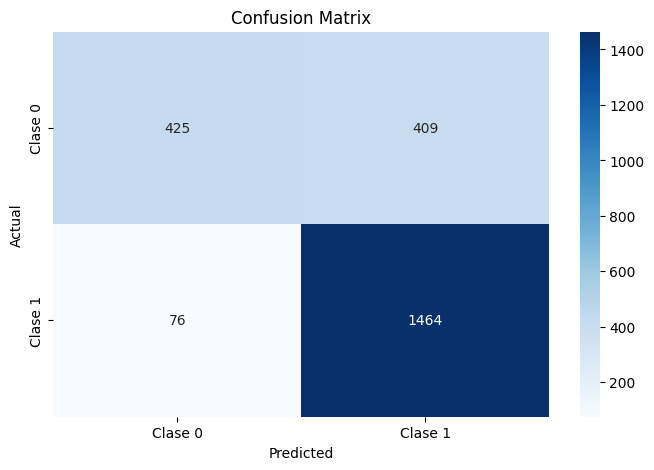

In [29]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)  # Aquí el modelo aprende a predecir 'venta' basado en las características de X_train

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
# Medir el accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar resultados
print(f"Accuracy: {accuracy}")
#print("Confusion Matrix:")
#print(conf_matrix)
print("Classification Report:")
print(class_report)

# Crear un heatmap para la matriz de confusión
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***
***
## **Predecir el precio del plan en función del estrato (price_plan)**

In [141]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [193]:
# Definir la variable objetivo (Y) y las variables predictoras (X)
X_reg = df.drop(columns=['price_plan'])  # Eliminamos la variable objetivo del conjunto de predictores
y_reg = df['price_plan']  # Variable objetivo

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# Predicciones en el conjunto de prueba
y_pred_reg = rf_regressor.predict(X_test_reg)

# Evaluar el modelo
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

# Mostrar resultados
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 889.0865329587143
MSE: 3778795.644424096
RMSE: 1943.912458014531
R2: 0.9094693546878495


MAE (Error Absoluto Medio): 889.08
- En promedio, el modelo se equivoca por ~813 unidades monetarias al predecir el precio del plan.
- El error absoluto medio (~813) indica que en la mayoría de los casos, la predicción del precio estará dentro de un margen aceptable.

MSE (Error Cuadrático Medio): 3,778,795.64
- Indica la variabilidad de los errores (los valores grandes son comunes en MSE).

RMSE (Raíz del Error Cuadrático Medio): 1943.91
- Un error promedio de ~1944 unidades.

R² (Coeficiente de Determinación): 0.91
- El modelo explica el 91% de la variabilidad en price_plan, lo cual es bastante bueno.
- Un R² de 0.91 indica que el modelo es muy bueno para predecir price_plan en función de las variables disponibles.


Sin embargo, si el precio del plan varía en rangos pequeños, este error puede ser significativo.

In [192]:
df = pd.read_csv("./Data/data_codificada.csv")
# Eliminar duplicados y mantener solo la primera aparición
df = df.drop_duplicates()

df = df.drop([
    'motivo_rechazo_solicitud_No Aplica', 
    'motivo_rechazo_solicitud_Financiero',
    'motivo_rechazo_solicitud_Errores en la Solicitud'
], axis=1)

In [196]:
# Usar solo el estrato como predictor
X_reg = df[['estrato']]
y_reg = df['price_plan']

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# Predecir solo para los valores únicos de estrato
estrato_unicos = X_reg['estrato'].unique()
estrato_unicos = sorted(estrato_unicos)  # Ordenar los valores únicos

# Crear un dataframe con los valores únicos de estrato
df_pred = pd.DataFrame({'estrato': estrato_unicos})
df_pred['price_plan_predicted'] = rf_regressor.predict(df_pred)
print(df_pred)



   estrato  price_plan_predicted
0        1          65197.468626
1        2          65799.384275
2        3          65805.340400
3        4          71676.997531
4        5          72744.925905
5        6          74421.427965
